# Domácí výhoda ve fotbale
Bedřich Mazourek

<br>

Domácí výhoda je fenomén, kdy týmy hrající ve svém domácím stadionu vyhrávají častěji než hosté. 
Tento jev se vysvětluje několika faktory:

- 1) Domácí tým má podporu fanoušků, takže hraje lépe
- 2) Rozhodčí podvědomě pískají méně faulů způsobených domácím týmem, aby na ně nebučelo publikum.
- 3) Domácí tým hraje na svém teritoriu, takže má větší psychologickou sebejistotu
- 4) Jev je sebenaplňující proroctví - domácí hráči očekávají, že vyhrají, takže hrají s větší jistotou, což se poté promítne do výsledku

Během covidové pandemie byly stadiony zavřené a hrálo se bez fanoušků, což poskytlo unikátní příležitost tento fenomén pozorovat, a blíže se podívat na vliv prvních dvou faktorů


## Data
Budu používat následují dva soubory dat:
- 1) Výsledky mezinárodních zápasů od roku 1872 - https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017
- 2) Zápasy evropských lig sezóny 2019/20 - https://osf.io/4hu8r/?view_only=1176423f8b594ddbb0d93b5c45856557


## Příklad 1 - Mezinárodní zápasy

- Nejdříve by mě zajímalo, jestli vskutku můžeme pozorovat nějakou domácí výhodu
- K tomu bude potřeba z dat odfiltrovat pryč zápasy hrané na neutrálním uzemí a zápasy během covidu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('international_results.csv')
df = df.iloc[::-1]                               # Reverse

df = df.loc[df['neutral'] == False]              # Games played in non-neutral stadiums
pre_covid = df.loc[df['date'] < '2020-01-01']    # Get all matches played before covid (circa 2020)

In [3]:
# Get total number of wins from match results
def get_results(label, home_goals, away_goals): 
    if len(home_goals) != len(away_goals):
        print("Different list sizes")
        return
    
    wins = losses = draws = 0
    for x,y in zip(home_goals, away_goals):
        if x > y: 
            wins += 1
        elif x == y:
            draws += 1
        else:
            losses += 1
    
    pie_chart(label, wins, draws, losses)
    
def pie_chart(label,wins,draws,losses):
    y = [wins,draws,losses]
    mylabels = ['Home', 'Draw', 'Away']
    
    plt.title(label)
    plt.pie(y, labels = mylabels ,shadow=True, autopct='%1.1f%%',)
    plt.show()

Sample size is: 31469 matches played before covid


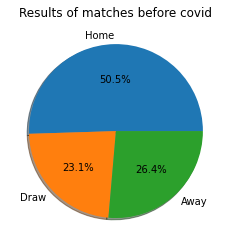

In [4]:
home_goals = pre_covid.iloc[:,3].values     
away_goals = pre_covid.iloc[:,4].values
print(f'Sample size is: {len(pre_covid)} matches played before covid')
get_results('Results of matches before covid', home_goals, away_goals)

ValueError: At least one argument from "cellColours" or "cellText" must be provided to create a table.

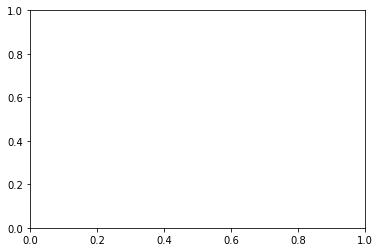

In [6]:
plt.table(cellText=[['ASLKDJ', '23'], ['12', '1242']])
plt.show()

- Hned můžeme vidět, že rozdělení výher a velikost vzorku velmi silně podporuje hypotézu domácí výhody.
- Nyní by mě zajímalo, jestli jde na stejném datasetu pozorovat nějaká změna výsledků pro období coronaviru, kdy byly stadiony povětšinou zavřené a hrálo se bez fanoušků
  - Z internetových článků napsaných v té době jsem udělal hrubý odhad, že stadiony byly nejvíce zavřené od března 2020 do března 2021. 
  - Samozřejmě průběh pandemie byl v různých částech světa jiný a určitě v tomto období byly i hry s fanoušky, ale můžeme se pokusit o aproximaci

Sample size: 269 matches played during covid


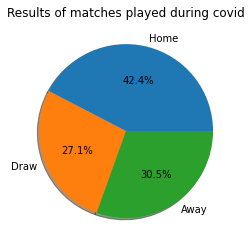

In [5]:
covid = df.loc[df['date'] > '2020-03-01'].loc[df['date'] < '2021-03-01']       # Matches approximately from the most intense covid period
covid_home = covid.iloc[:,3].values     # Home goals during covid
covid_away = covid.iloc[:,4].values     # Away goals during covid
print(f'Sample size: {len(covid)} matches played during covid')
get_results('Results of matches played during covid', covid_home, covid_away)

- Přestože je velikost vzorku menší a výběr časového období nejistý, můžeme vidět, že se trend docela výrazně změnil, a domácí vyhráli bez fanoušků pouze 42% her - o 8% méně než předtím 

## Příklad 2 - Evropské ligy
- Nyní se můžeme podívat na výsledky evropských lig, hrané 2019/2020 
- Velká výhoda tohoto datasetu je, že přibližně tři čtvrtiny her se hrály před coronavirem a zbylá čtvrtina během, takže budeme porovnávat jablka s jablky
- Také je v datech přímo řečené, které zápasy se hrály s publikem a které bez, takže teď nemusíme dělat žádné odhady

In [6]:
df2 = pd.read_excel("europe.xlsx")
full = df2.loc[df2['Covid'] == 0].loc[df2['Venue'] == 1]       # Full stadiums before corona
empty = df2.loc[df2['Covid'] == 1].loc[df2['Venue'] == 0]      # Empty stadiums during corona

Sample size is: 3600 matches played before coronavirus


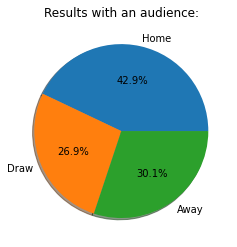

In [7]:
# FTR = Full Time Results
home_wins = full['FTR'].value_counts()['H']     # 'H' = Home Win
draws = full['FTR'].value_counts()['D']         # 'D' = Draw
away_wins = full['FTR'].value_counts()['A']     # 'A' = Away Win

print(f'Sample size is: {len(full)} matches played before coronavirus')
pie_chart('Results with an audience:', home_wins, draws, away_wins)

- Okamžitě si můžeme všimnout, že přestože domácí výhodu stále můžeme pozorovat, tak pro evropské ligy je šance výhry domácích o 7% menší než pro mezinárodní zápasy
- Asi je zbytečné spekulovat o tom, proč to tak je, ale jedno vysvětlení by mohlo být, že během mezinárodních zápasů je ve stadionech mnohem více domácích fanoušků než fanouškům hostů.
  - Například pokud hraje Španělsko proti Německu ve španělském stadionu, tak se dá očekávat, že španělských fanoušků bude výrazně více než německých
  - Na druhou stranu při zápase Sparty proti Slávii bude poměr fanoušků relativně rovnoměrný, bez ohledu na to v jakém stadionu se zápas koná
- Každopádně nyní se můžeme podívat na zápasy hrané během coronaviru   

Sample size is: 1414 matches played during coronavirus


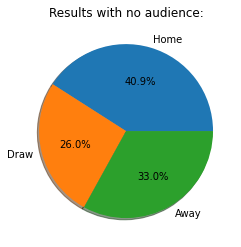

In [8]:
home_wins = empty['FTR'].value_counts()['H'] 
draws = empty['FTR'].value_counts()['D']
away_wins = empty['FTR'].value_counts()['A']

print(f'Sample size is: {len(empty)} matches played during coronavirus')
pie_chart('Results with no audience:', home_wins, draws, away_wins)

- Přestože pokles není tak drastický jako u mezinárodních zápasů, znovu můžeme pozorovat snížení domácích výher v prázdných stadionech
- To nám již může dát docela silnou jistotu, že fanoušci mají nezanedbatelný vliv na výsledky zápasů

## Příklad 3 - Chovaní rozhodčích
- Data o evropských zápasech jsou relativně podrobná a obsahují i počty žlutých a červených karet
- Toho můžeme využít a podívat se, jestli rozhodčí vskutku mění své chování podle toho, jestli je přítomno publikum

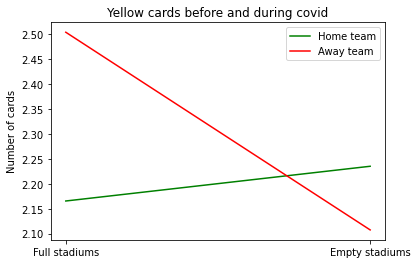

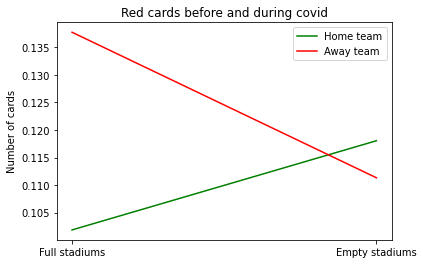

In [9]:
def show_card(card_type):               # card_type = Yellow/Red
    home = 'H' + card_type[0]           # HY = Home Yellow, HR = Home Red
    home_full = get_avg(full, home)     # Home team full stadium
    home_empty = get_avg(empty, home)   # Home team empty stadium
    
    away = 'A' + card_type[0]           # AY = Away Yellow, AR = Away Red
    away_full = get_avg(full, away)     # Away team full stadium
    away_empty = get_avg(empty, away)   # Away team empty stadium
    
    plot_graph([home_full, home_empty], [away_full, away_empty], card_type)
    

# U několika zápasů data o počtu karet chybí, takže průměr spočítáme mírnou oklikou
def get_avg(data, type):
    vals = data[type].values
    suma = 0
    counter = 0
    
    for val in vals:
        try:
            suma += val
            counter += 1
        except TypeError:
            pass
    
    return suma/counter    

def plot_graph(home_stats, away_stats, card_type):
    plt.plot(['Full stadiums', 'Empty stadiums'], home_stats, '-g', label = 'Home team')
    plt.plot(['Full stadiums', 'Empty stadiums'], away_stats, '-r', label = 'Away team')
    
    plt.title(f'{card_type} cards before and during covid')
    plt.ylabel("Number of cards")

    plt.legend()
    plt.show()
    
show_card('Yellow')
show_card('Red')

- Z dat můžeme vidět nárůst počtu karet pro domácí a relativně strmé snížení počtu pro hosty
- Domácí týmy také v prázdných stadionech dostávají více karet než hosté. To by se dalo vysvětlit tím, že na domácí půdě jsou hráči agresivnější, a také jsou zvyklí na to, že jim to obvykle rozhodčí častěji promine

## Závěr
- Můžeme s jistotou říci, že domácí výhoda existuje - z dat jsme viděli 50% šanci výhry mezinárodních zápasů a 43% výhry v evropské lize pro domácí týmy
- Také jsme mohli pozorovat snížení domácí výhody ve stadionech bez publika. Z toho můžeme odvodit, že fanoušci mají vliv na výsledek zápasu
- Jeden pozorovatelný vliv fanoušků je na chování rozhodčích, u nichž můžeme vidět, že bez publika dávájí více karet domácím a méně karet hostům, což má potom vliv na výsledek zápasu
- Velmi zajímavé je, že silnou domácí výhodu lze stále pozorovat i bez fanoušků. Pro evropské ligy to byla pravděpodobnost výhry domácích 41%, zatímco hostů pouze 33%
  - Z toho můžeme vydedukovat, že přestože fanoušci mají vliv, existuje více faktorů. Ať je to sebenapňující proroctví, teritoriální sebejistota, či něco úplně jiného, záhada domácí výhody stále přetrvává 
